In [ ]:
from dotenv import load_dotenv
import os
from pathlib import Path

env_path = Path(".") / ".env"
load_dotenv(dotenv_path=env_path, override=True)

GOOGLE_API_KEY = os.environ["GOOGLE_API_KEY"]

GOOGLE_API_KEY
GROQ_API_KEY=os.environ["GROQ_API_KEY"]
GROQ_API_KEY

In [2]:
import os
from langchain.chat_models import init_chat_model


model = init_chat_model(
    "groq:qwen/qwen3-32b",
    # Kwargs passed to the model:
    temperature=0.7,
    timeout=30,
    max_tokens=1000,
)


# Step 2: Define State

In [3]:
from typing import TypedDict

class QAState(TypedDict):
    question: str
    context: str
    answer: str


# Step 3: Create Nodes

#Retrieval Node (Mock Retriever for Training)

In [4]:
def retrieve_node(state: QAState):
    print("➡️ Retrieval Node")
    
    # Fake retrieval logic (replace with vector DB later)
    context = f"Relevant info about: {state['question']}"
    
    return {"context": context}


#LLM Answer Node

In [5]:

import os
from langchain.chat_models import init_chat_model


model = init_chat_model(
    "groq:qwen/qwen3-32b",
    # Kwargs passed to the model:
    temperature=0.7,
    timeout=30,
    max_tokens=1000,
)

llm = model

def llm_node(state: QAState):
    print("➡️ LLM Node")

    prompt = f"""
    Use the context to answer the question.

    Context:
    {state['context']}

    Question:
    {state['question']}
    """

    response = llm.invoke(prompt)
    return {"answer": response.content}


In [6]:
from langgraph.graph import StateGraph

graph = StateGraph(QAState)

graph.add_node("retrieve", retrieve_node)
graph.add_node("llm", llm_node)

graph.set_entry_point("retrieve")
graph.add_edge("retrieve", "llm")
graph.set_finish_point("llm")

app = graph.compile()


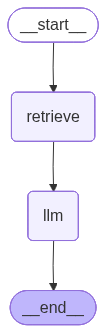

In [7]:
app

In [8]:
result = app.invoke({"question": "What is LangGraph?"})
print("\n✅ Final Answer:\n", result["answer"])


➡️ Retrieval Node
➡️ LLM Node

✅ Final Answer:
 <think>
Okay, the user is asking, "What is LangGraph?" So I need to use the provided context to answer this. Let me start by recalling the context given. The context says, "Relevant info about: What is LangGraph?" but then the actual answer isn't provided here. Wait, maybe the user expects me to generate a general answer based on my existing knowledge since the context is just a placeholder.

Hmm, the user probably wants a concise definition of LangGraph. Let me think. LangGraph is a library or framework for building stateful, graph-based agents in the LangChain ecosystem. It allows developers to create complex workflows by defining nodes and edges in a graph structure. Each node can perform specific functions, and the edges determine the flow between these nodes. This is particularly useful for applications that require multi-step processes with conditional logic.

I should mention that LangGraph is part of the LangChain project, which i

# Training Task 2
Local Debugging & Understanding Transitions

Step 6: Debug State Transitions

Add debug prints to nodes

In [14]:
def retrieve_node(state: QAState):
    print("\n[DEBUG] State before retrieval:", state)
    context = f"Relevant info about: {state['question']}"
    return {"context": context}

def llm_node(state: QAState):
    print("\n[DEBUG] State before LLM:", state)
    response = llm.invoke(
        f"Context: {state['context']}\nQuestion: {state['question']}"
    )
    return {"answer": response.content}
def format_node(state: QAState):
    print("➡️ Format Node")
    return {"answer": f"FINAL ANSWER:\n{state['answer']}"}



In [15]:
from langgraph.graph import StateGraph

graph = StateGraph(QAState)

# ✅ Add nodes first
graph.add_node("retrieve", retrieve_node)
graph.add_node("llm", llm_node)
graph.add_node("format", format_node)

# ✅ Define flow
graph.set_entry_point("retrieve")
graph.add_edge("retrieve", "llm")
graph.add_edge("llm", "format")
graph.set_finish_point("format")

# ✅ Compile
app = graph.compile()


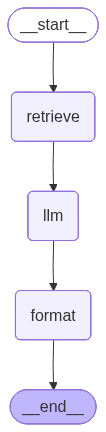

In [17]:
app


In [18]:
result = app.invoke({"question": "What is LangGraph?"})

print("\n✅ Final Output:")
print(result["answer"])



[DEBUG] State before retrieval: {'question': 'What is LangGraph?'}

[DEBUG] State before LLM: {'question': 'What is LangGraph?', 'context': 'Relevant info about: What is LangGraph?'}
➡️ Format Node

✅ Final Output:
FINAL ANSWER:
<think>
Okay, I need to explain what LangGraph is. Let me start by recalling what I know. LangGraph is related to language models and graph structures. Maybe it's about how to represent information from language models in a graph format? Or perhaps it's a tool that uses graph-based methods for language processing tasks.

Wait, I remember that LangGraph is part of the LangChain ecosystem. LangChain is a framework for developing applications with large language models. So LangGraph might be an extension or component of that. The name suggests a graph, so it's probably a way to model workflows or dependencies using graphs. In programming, a graph can represent nodes and edges, where each node is a step in a process, and edges show the flow.

So LangGraph could be